# Traffic Signs Analyzer

Tensorflow project to build a deep learning model for Belgian traffic signs recognition

### Data sources: 
BelgiumTS for Classification (cropped images): 
- BelgiumTSC_Training
- BelgiumTSC_Testing

http://btsd.ethz.ch/shareddata/

In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
import random
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

## TensorFlow Basics

### Example 1: Multiplying two constants
The result is not getting calculated: we just defined the model but no process ran to calculate the result. Printing result does not really show a result.

In [4]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

In [5]:
x1

<tf.Tensor 'Const:0' shape=(4,) dtype=int32>

In [6]:
x2

<tf.Tensor 'Const_1:0' shape=(4,) dtype=int32>

In [7]:
# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


### Example 2: Multiplying two constants interactively
Running the code in an interactive session to actually see the result

In [8]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


## Loading and Exploring the Data

In [17]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "./data/"
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)



### Initial Look at Data

In [21]:
# convert images and labels to numpy array for print to work
images = np.array(images)
labels = np.array(labels)

# Print the `images` dimensions
print(images.ndim)

# Print the number of `images`'s elements
print(images.size)

# Print the first instance of `images`
images[0]

1
4575


array([[[210, 249, 232],
        [204, 249, 208],
        [197, 198, 155],
        ...,
        [ 51,  60,  40],
        [ 54,  64,  44],
        [ 57,  66,  46]],

       [[209, 250, 236],
        [212, 255, 217],
        [200, 196, 156],
        ...,
        [ 49,  57,  38],
        [ 51,  59,  41],
        [ 53,  60,  42]],

       [[203, 246, 236],
        [207, 246, 213],
        [202, 192, 156],
        ...,
        [ 47,  53,  35],
        [ 48,  54,  36],
        [ 48,  55,  37]],

       ...,

       [[  2,  22,  25],
        [ 26,  56,  77],
        [ 71, 140, 159],
        ...,
        [ 84,  77,  50],
        [ 68,  66,  41],
        [ 56,  64,  44]],

       [[  0,  22,  32],
        [ 30,  75, 106],
        [ 87, 176, 198],
        ...,
        [ 86,  80,  52],
        [ 68,  66,  41],
        [ 55,  63,  42]],

       [[  0,  32,  50],
        [ 42, 101, 135],
        [121, 217, 239],
        ...,
        [ 87,  80,  52],
        [ 70,  68,  43],
        [ 58,  66,  46]]

In [22]:
# Print the `labels` dimensions
print(labels.ndim)

# Print the number of `labels`'s elements
print(labels.size)

# Count the number of labels
print(len(set(labels)))

1
4575
62


In [39]:
p = figure(title="Distribution of Traffic Sign Labels",tools="save",
            background_fill_color="#dadad9")

hist, edges = np.histogram(labels, bins=62)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#06aee2", line_color="#024c4b")

show(p)

IMAGES


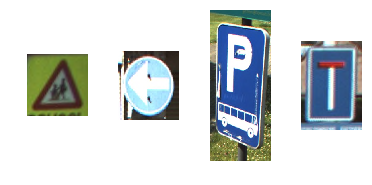


IMAGES WITH SHAPES


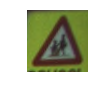

shape: (62, 61, 3), min: 3, max: 160


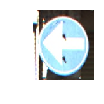

shape: (110, 96, 3), min: 3, max: 255


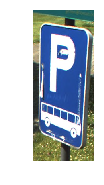

shape: (379, 153, 3), min: 0, max: 255


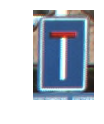

shape: (100, 68, 3), min: 17, max: 255


In [53]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

how_many_images = len(traffic_signs)

# Fill out the subplots with the random images that you defined 
for i in range(how_many_images):
    plt.subplot(1, how_many_images, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
print("IMAGES")
plt.show()

print("\nIMAGES WITH SHAPES")
# Fill out the subplots with the random images and add shape, min and max values
for i in range(how_many_images):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))


### Plotting an overview of all the 62 classes and one image that belongs to each clas

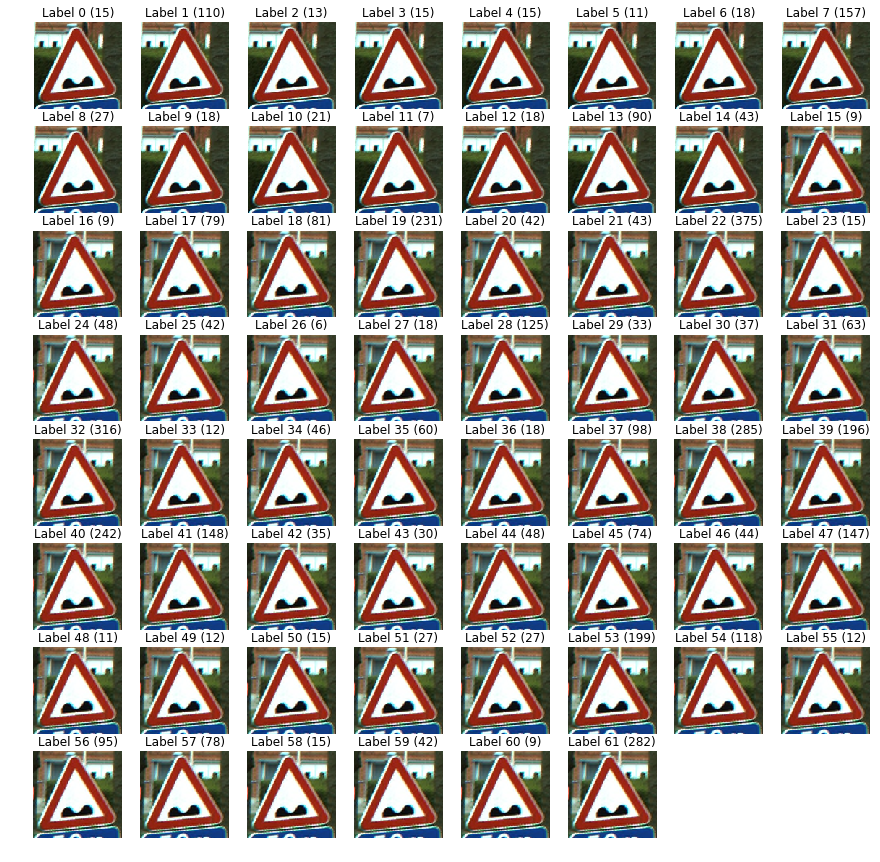

In [101]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels[label]]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, pd.Series(labels).value_counts()[label]))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()